## Tool box
### 1. Data Preprocessing and EDA
#### 1.1 missing data
#### 1.2 outliers detection and removal
#### 1.3 scaling
#### 1.4 Data Balance technique
#### 1.5 Data plotting

### 2, Feature Engineering
#### 2.1 Polynomial
#### 2.2 get dummies
#### 2.3 select best k features
https://towardsdatascience.com/a-practical-guide-to-feature-selection-using-sklearn-b3efa176bd96
#### 2.4 PCA
#### 2.5 Transformations: log, 倒数, square root, power


### 3, Model build and Fit
#### 3.1 classification
* Gaussian Naive Bayes
* Logistic Regression
* etc

#### 3.2 regression
* Linear regression, lasso, ridge, ElasticNet
* Gradient Boosting Regression
* RandomForestRegressor
* SVM
* XGBoost Regressor
* LGBM Regressor

### 4, Cross Validation


### 5, GridSearch/Parameter tunning
* GridSearchCV, RandomGridSearch

### 6, Result Analysis/Plotting
* stacking
* ROC AUC curve

### 7, something extra
* StackingClassifer, StackingRegressor


### Visualization tools
* correlation matrix
* dignoistic plot for single feature


In [1]:
# Imported Libraries

#Basics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


#Data Preprocessing
#missing data imputers


#drop outliers


#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler



import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time



#Feature Engineering





# Model Build and Fit
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Regression Libraries


# Cross Validation


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

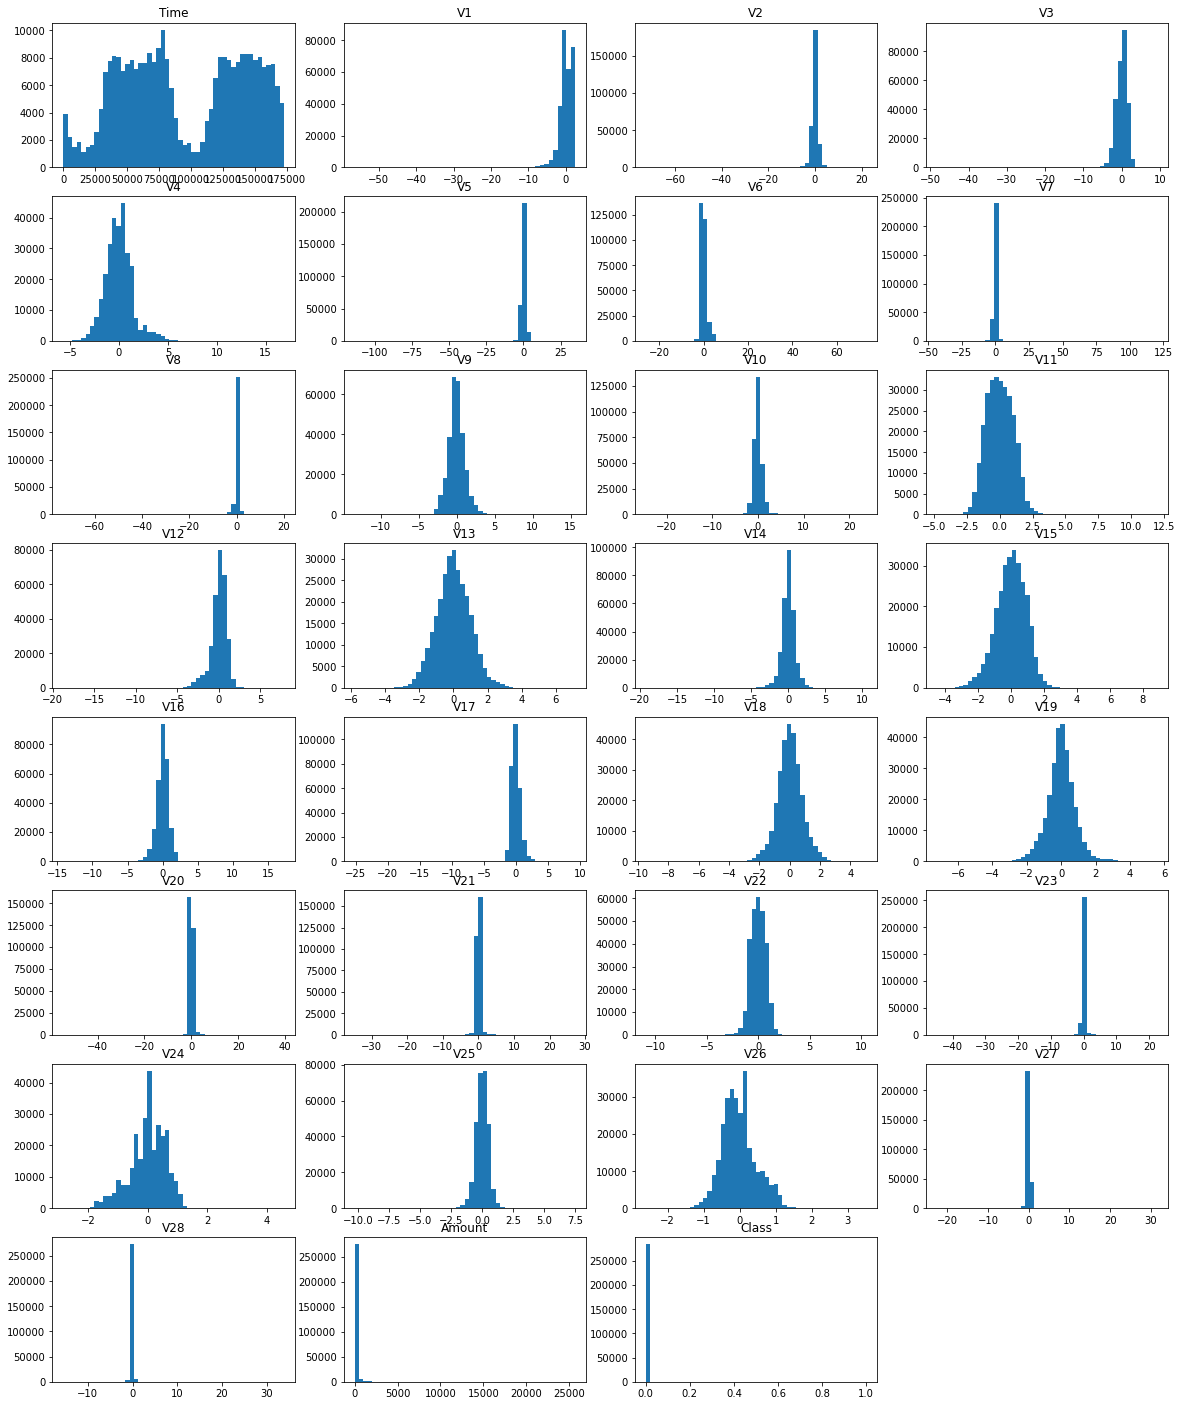

In [4]:
plt.figure(figsize=(20,25))
for idx,ele in enumerate(df.columns):
    plt.subplot(8,4,idx+1)
    plt.hist(df.loc[:,ele], bins = 50)
    plt.gca().set_title(ele)
    
plt.show()

In [5]:
def feature_hist_plotter(df, feature_names, row_nums, col_nums):
    fig, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(20, 25), sharex=False, sharey=False)
    axes = axes.ravel()  # array to 1D

    for col, ax in zip(feature_names, axes):
        #data = df[[col, 'class']]  # select the data
        #sns.kdeplot(data=data, x=col, hue='class', shade=True, ax=ax)

        data = df[[col]]
        sns.kdeplot(data=data, x=col, shade=True, ax=ax)

        ax.set(title=f'{col}', xlabel=None)

    fig.delaxes(axes[5])  # delete the empty subplot
    fig.tight_layout()
    plt.show()

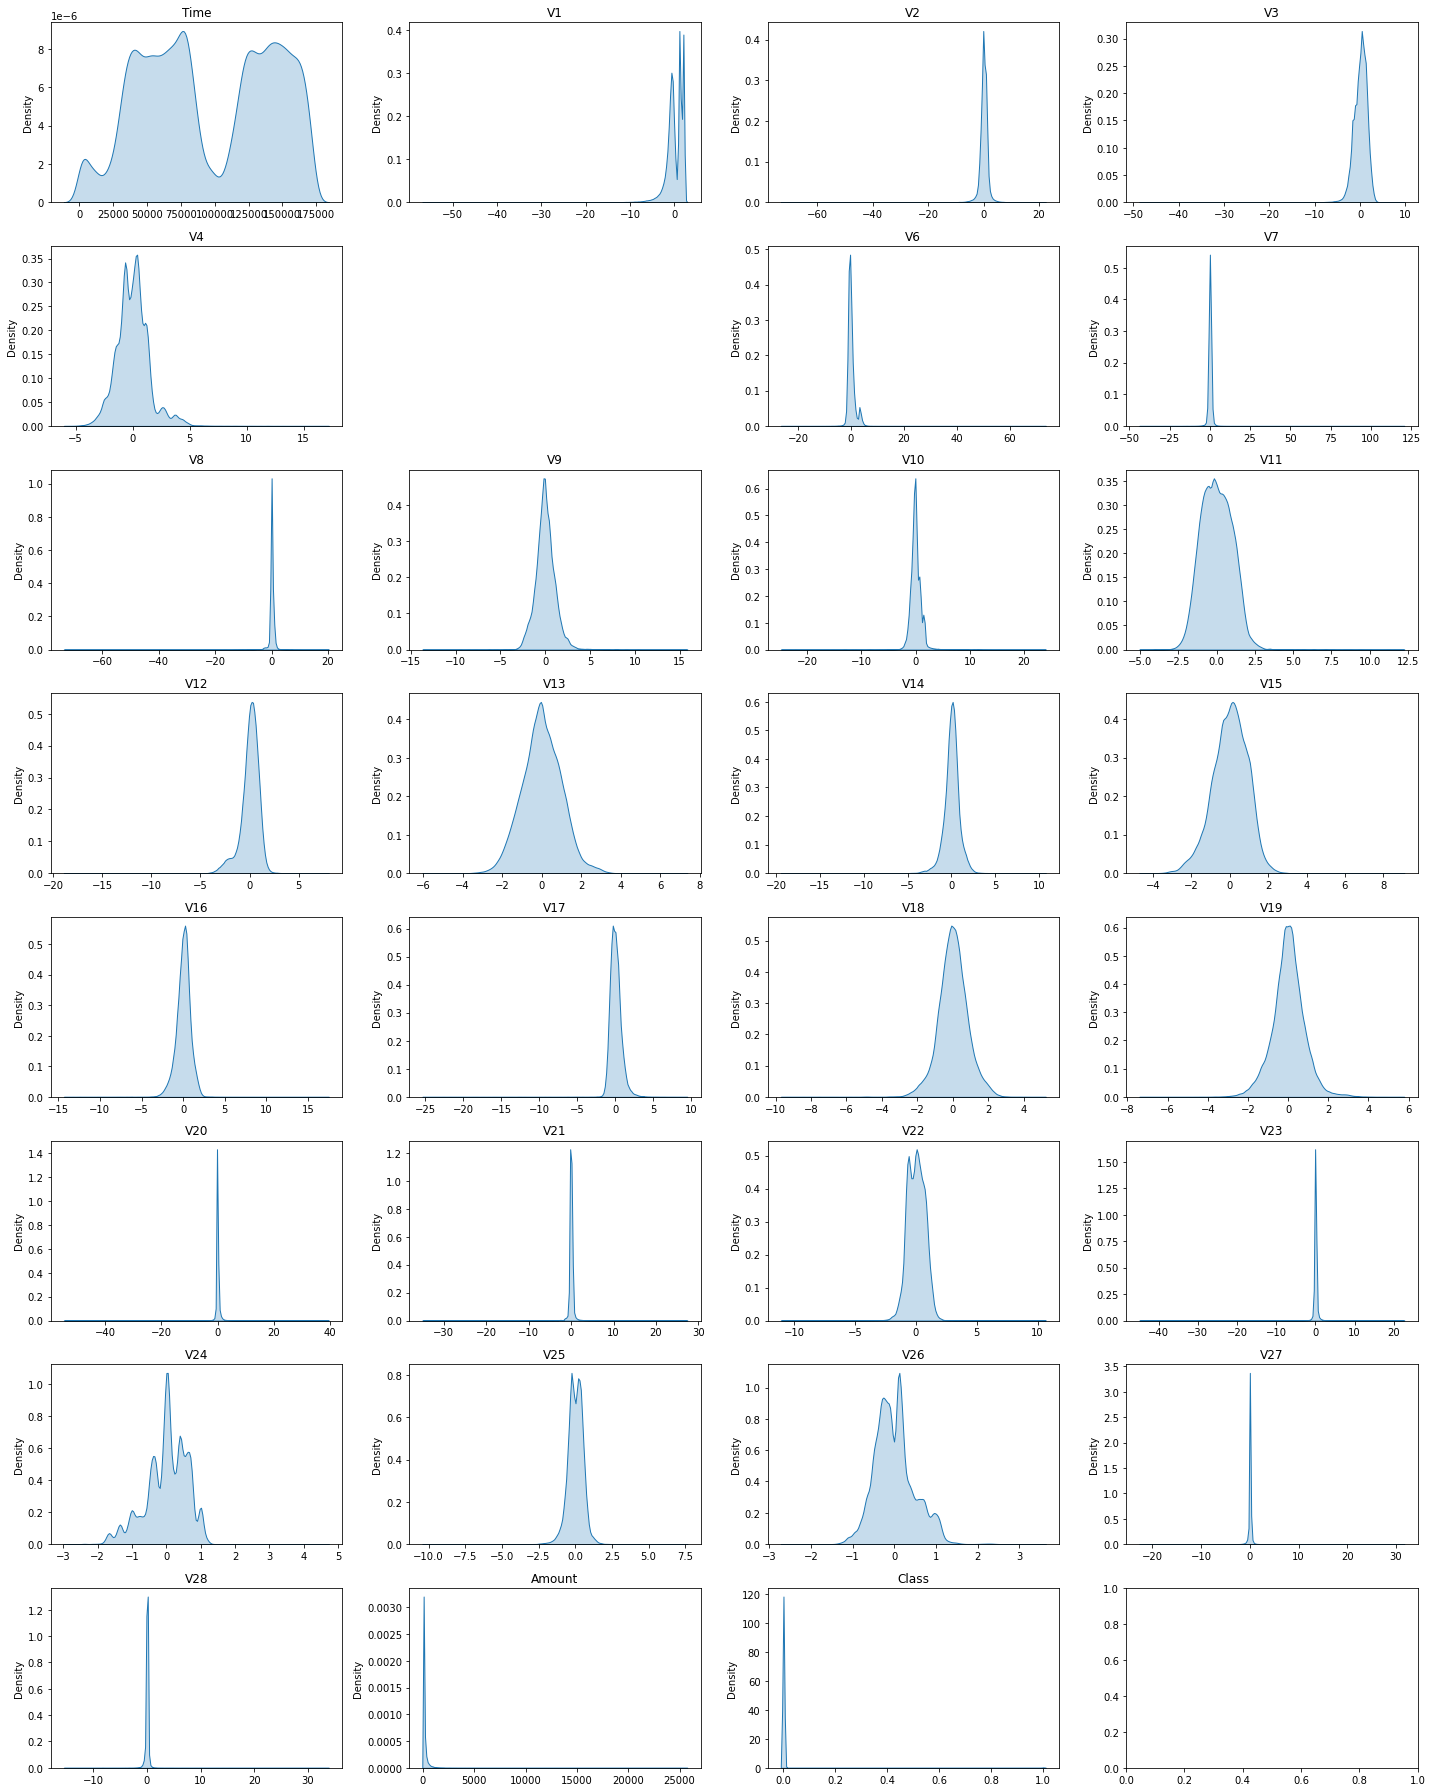

Time cost: 81.0546555519104


In [6]:
start = time.time()
features = list(df.columns)
feature_hist_plotter(df, features, 8, 4)
print("Time cost:", time.time() - start)

### 1.1 missing data

In [7]:
#check missing data
df.isnull().mean().sort_values(ascending = False).head()
#seems like no missing data

Class    0.0
V14      0.0
V1       0.0
V2       0.0
V3       0.0
dtype: float64

### 1.2 outliers detection and removal

In [8]:
# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

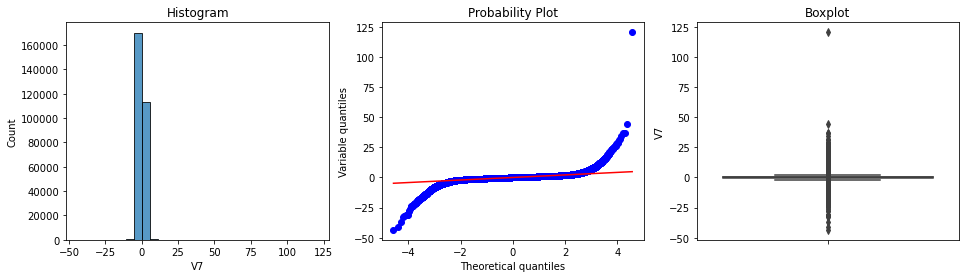

In [9]:
diagnostic_plots(df, 'V7')

In [10]:
from scipy.stats.mstats import winsorize

features_with_outliers = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

df[features_with_outliers] = df[features_with_outliers].apply(lambda x: winsorize(x, limits=[0.01, 0.01]))

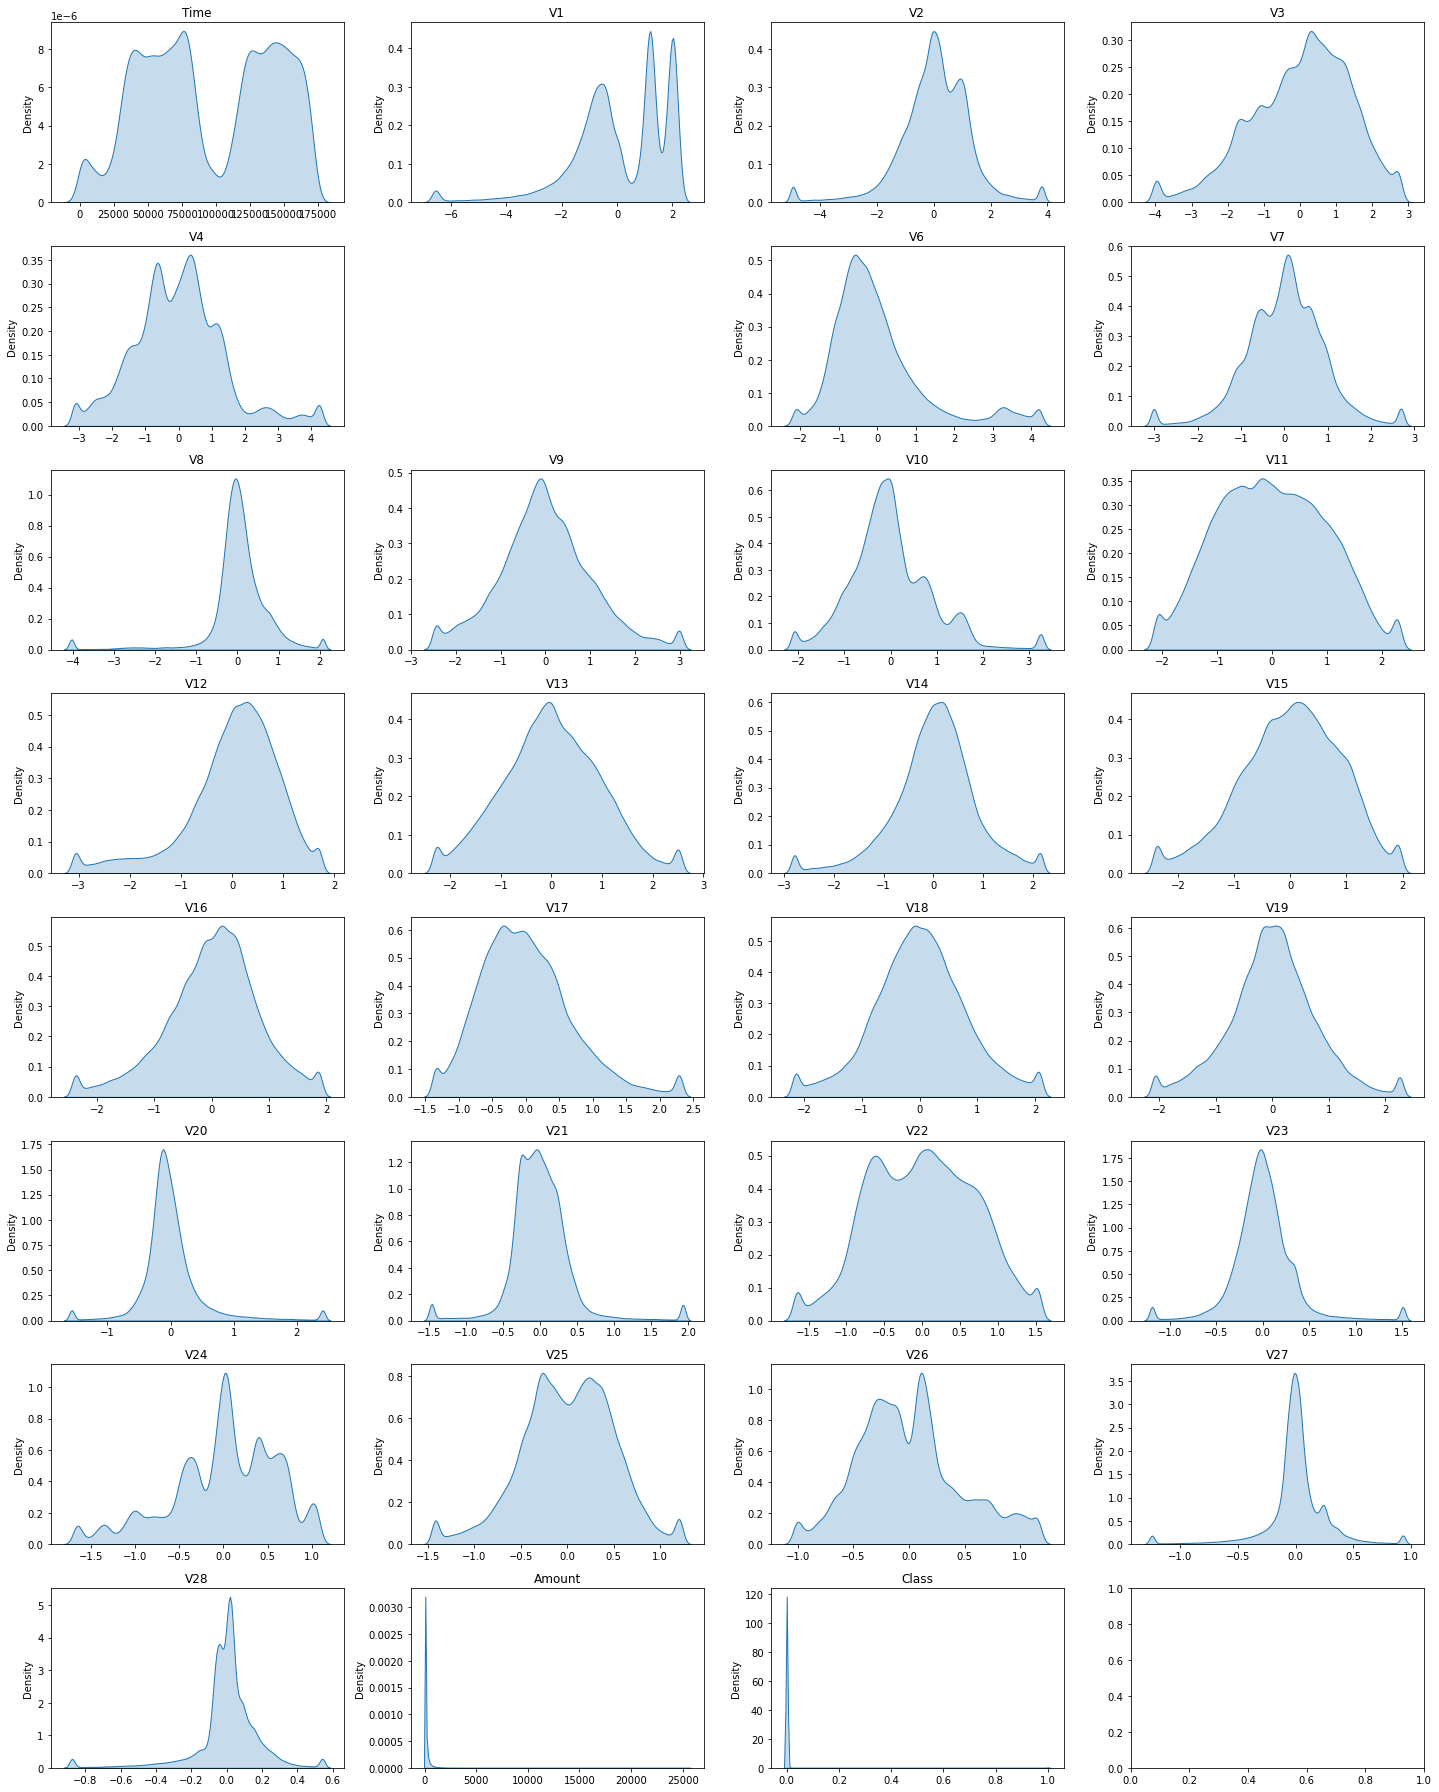

Time cost: 37.152199029922485


In [11]:
start = time.time()
features = list(df.columns)
feature_hist_plotter(df, features, 8, 4)
print("Time cost:", time.time() - start)

### 1.3 Scaling

In [12]:
# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [13]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 31 columns]

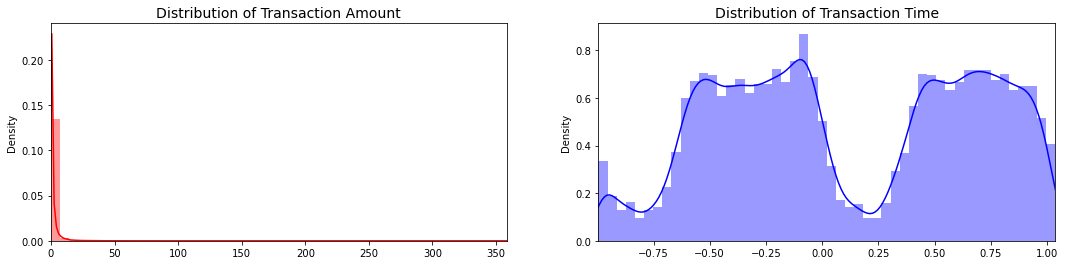

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['scaled_amount'].values
time_val = df['scaled_time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

Shape is preserved, but scale is much more better

### 1.4 Data Balance technique (optional, solve the imbalance data problem)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

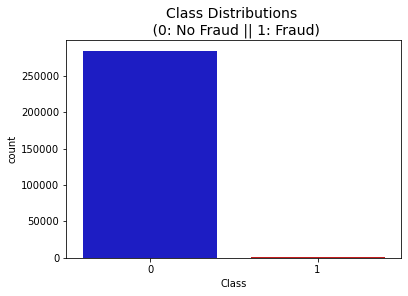

In [15]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [16]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

UnderSampling

In [17]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)
 
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

scaled_amount  scaled_time        V1        V2        V3        V4  \
183010      -0.167819     0.480809 -1.339028  0.426439  1.103253 -1.172538   
6446        -0.293440    -0.904851  0.702710  2.426433 -3.978385  4.248032   
141026      -0.140572    -0.007096  1.197011  0.087524 -0.074603  1.008951   
95534        0.138476    -0.227141  1.193916 -0.571085  0.742522 -0.014588   
79874       -0.236289    -0.311035 -0.443794  1.271395  1.206178  0.790371   

              V5        V6        V7        V8  ...       V20       V21  \
183010  1.377354 -0.648103  1.062121 -0.113768  ... -0.085113 -0.259344   
6446   -2.170806 -2.124030 -3.012874  0.911337  ...  0.422743  0.551180   
141026  0.443493  0.805869 -0.080443  0.227173  ... -0.158053 -0.129080   
95534  -0.624561  0.832162 -0.833350  0.272897  ...  0.062908 -0.049502   
79874   0.418935 -0.848376  0.917691 -0.235511  ... -0.067205  0.119279   

             V22       V23       V24       V25       V26       V27       V28  \
183010 -0.745315 -0.038948 -0.473999  0.721577  0.244662 -0.165252  0.028572   
6446   -0.009802  0.721698  0.473246 -1.420861  0.319476  0.600485  0.129305   
141026 -0.191588 -0.217451 -1.138554  0.775063 -0.256948  0.031412 -0.006170   
95534   0.207265 -0.265272 -0.679294  0.511812  1.158700 -0.028671 -0.006112   
79874   0.513479 -0.264243  0.443311  0.029516 -0.335141 -0.188815 -0.123391   

        Class  
183010      0  
6446        1  
141026      0  
95534       1  
79874       1  

[5 rows x 31 columns]

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


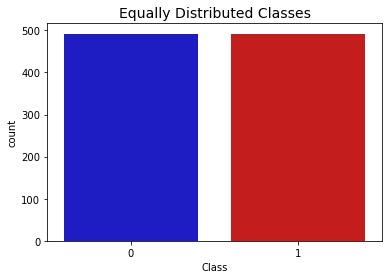

In [18]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## 2. Feature Engineering

## 3. Model build and fit

In [19]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [20]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [22]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [23]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % accuracy score


## 5. Parameter Tunning/Grid Search

In [24]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [25]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.66%
Knears Neighbors Cross Validation Score 94.41%
Support Vector Classifier Cross Validation Score 94.66%
DecisionTree Classifier Cross Validation Score 93.14%


## 4. Cross Validation

In [26]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 54802  54945  55525 ... 284804 284805 284806] Test: [    0     1     2 ... 56963 56964 56965]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 54802  54945  55525 ... 113926 113927 113928]
Train: [     0      1      2 ... 284804 284805 284806] Test: [110757 110772 111237 ... 170885 170886 170887]
Train: [     0      1      2 ... 284804 284805 284806] Test: [167282 169479 170541 ... 231981 232110 232740]
Train: [     0      1      2 ... 231981 232110 232740] Test: [227836 227837 227838 ... 284804 284805 284806]


In [27]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
#undersample = CondensedNearestNeighbour(n_neighbors = 1)
#X_nearmiss, y_nearmiss = undersample.fit_sample(undersample_X.values, undersample_y.values)

print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 54802  54945  55525 ... 284804 284805 284806] Test: [    0     1     2 ... 56963 56964 56965]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 54802  54945  55525 ... 113926 113927 113928]
Train: [     0      1      2 ... 284804 284805 284806] Test: [110757 110772 111237 ... 170885 170886 170887]
Train: [     0      1      2 ... 284804 284805 284806] Test: [167282 169479 170541 ... 231981 232110 232740]
Train: [     0      1      2 ... 231981 232110 232740] Test: [227836 227837 227838 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [28]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    #f, ax1 = plt.subplots(figsize=(20,14), sharey=True)
    f, ax1 = plt.subplots(sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

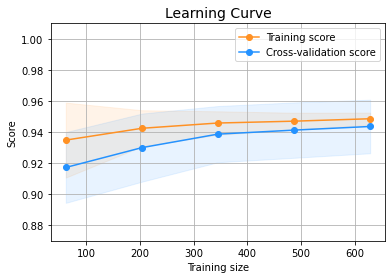

In [29]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

## 6. Result Analysis/Plotting

In [30]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [31]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9817982030896517
KNears Neighbors:  0.9431517031866072
Support Vector Classifier:  0.9791804020425312
Decision Tree Classifier:  0.9303600284403077


In [32]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

In [33]:
# Create an empty figure, and iteratively add new lines
# every time we compute a new class
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import roc_curve, auc

def ROC_AUC_plotter(fpr_array, tpr_array, title_array):
    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(len(fpr_array)):
        fpr = fpr_array[i]
        tpr = tpr_array[i]
        title = title_array[i]

        name = f"({title} AUC={auc(fpr, tpr):.4f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        title = "ROC AUC curve",
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=700, height=500
    )
    fig.show()

fpr_array = [log_fpr, knear_fpr, svc_fpr]
tpr_array = [log_tpr, knear_tpr, svc_tpr]
title_array = ["Logistic", "KNear", "SVC"]
ROC_AUC_plotter(fpr_array, tpr_array, title_array)


### Terms:
<ul>
<li><b>True Positives:</b> Correctly Classified Fraud Transactions </li>
<li><b>False Positives:</b> Incorrectly Classified Fraud Transactions</li>
<li> <b>True Negative:</b> Correctly Classified Non-Fraud Transactions</li>
<li> <b>False Negative:</b> Incorrectly Classified Non-Fraud Transactions</li>
<li><b>Precision: </b>  True Positives/(True Positives + False Positives)  </li>
<li><b> Recall: </b> True Positives/(True Positives + False Negatives)   </li>
<li> Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.</li>
<li><b>Precision/Recall Tradeoff: </b> The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect. </li>
</ul>

### Summary:
<ul>
<li> <b>Precision starts to descend</b> between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score. </li>

</ul>


* accuracy = $\frac{tp+tn}{tp+tn+fp+fn}$
* precision = $\frac{tp}{tp+fp}$
* recall = $\frac{tp}{tp+fn}$
* f1 score = $\frac{2}{\text{recall}^{-1}+\text{precision}^{-1}}$


In [34]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.85
Precision Score: 0.92
F1 Score: 0.89
Accuracy Score: 0.89
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.89
Precision Score: 0.01
Recall Score: 0.89
F1 Score: 0.03
---------------------------------------------------------------------------------------------------------------------------------------


# Another problem for practice: regression for prediction

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
df_train = pd.read_csv('train.csv')
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [37]:
df_test = pd.read_csv("test.csv")
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

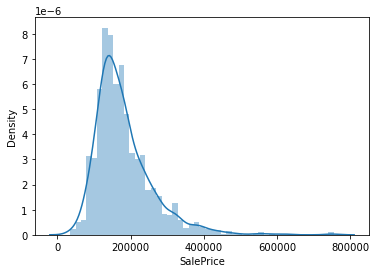

In [38]:
df_train_y = df_train["SalePrice"]
df_train_X = df_train.drop("SalePrice", axis = 1)
sns.distplot(df_train_y)

## 1.1 Missing Data

In [39]:
df_train_X.isnull().mean().sort_values(ascending = False).head(25)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
YearRemodAdd    0.000000
MSSubClass      0.000000
Foundation      0.000000
ExterCond       0.000000
ExterQual       0.000000
dtype: float64

In [40]:
variables_to_drop = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]

df_train_X = df_train_X.drop(variables_to_drop, axis = 1)
df_test_X = df_test.drop(variables_to_drop, axis = 1)

In [41]:
numeric_variable = list(df_train_X.select_dtypes(include = np.number).columns)
df_temp = df_train_X.drop(numeric_variable, axis = 1)
non_numeric_variable = list(df_temp.columns)
df_temp.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 38 columns]

In [42]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False, drop_first = True)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [43]:
for col in df_temp:
    print(df_temp[col].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood

In [44]:
df_train_X = dummy_df(df_train_X, non_numeric_variable)
df_train_X.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...               0               0   
1          1976         0.0         978  ...               0               0   
2          2002       162.0         486  ...               0               0   
3          1970         0.0         216  ...               0               0   
4          2000       350.0         655  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 233 columns]

In [45]:
zero_fill_columns = ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"]
for col in zero_fill_columns:
    df_train_X[col] = df_train_X[col].fillna(0)

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer.fit(df_train_X)

#Fix the problem of missing values in LotFrontage
df_train_X["LotFrontage"] = df_train_X["LotFrontage"].fillna(df_train_X["LotFrontage"].median())

#Drop the ID column since this may not be helpful
df_train_X = df_train_X.drop("Id", axis = 1)

df_train_X.isnull().mean().sort_values(ascending = False).head()

SaleCondition_Partial    0.0
Neighborhood_Sawyer      0.0
Condition1_RRNe          0.0
Condition1_RRAn          0.0
Condition1_RRAe          0.0
dtype: float64

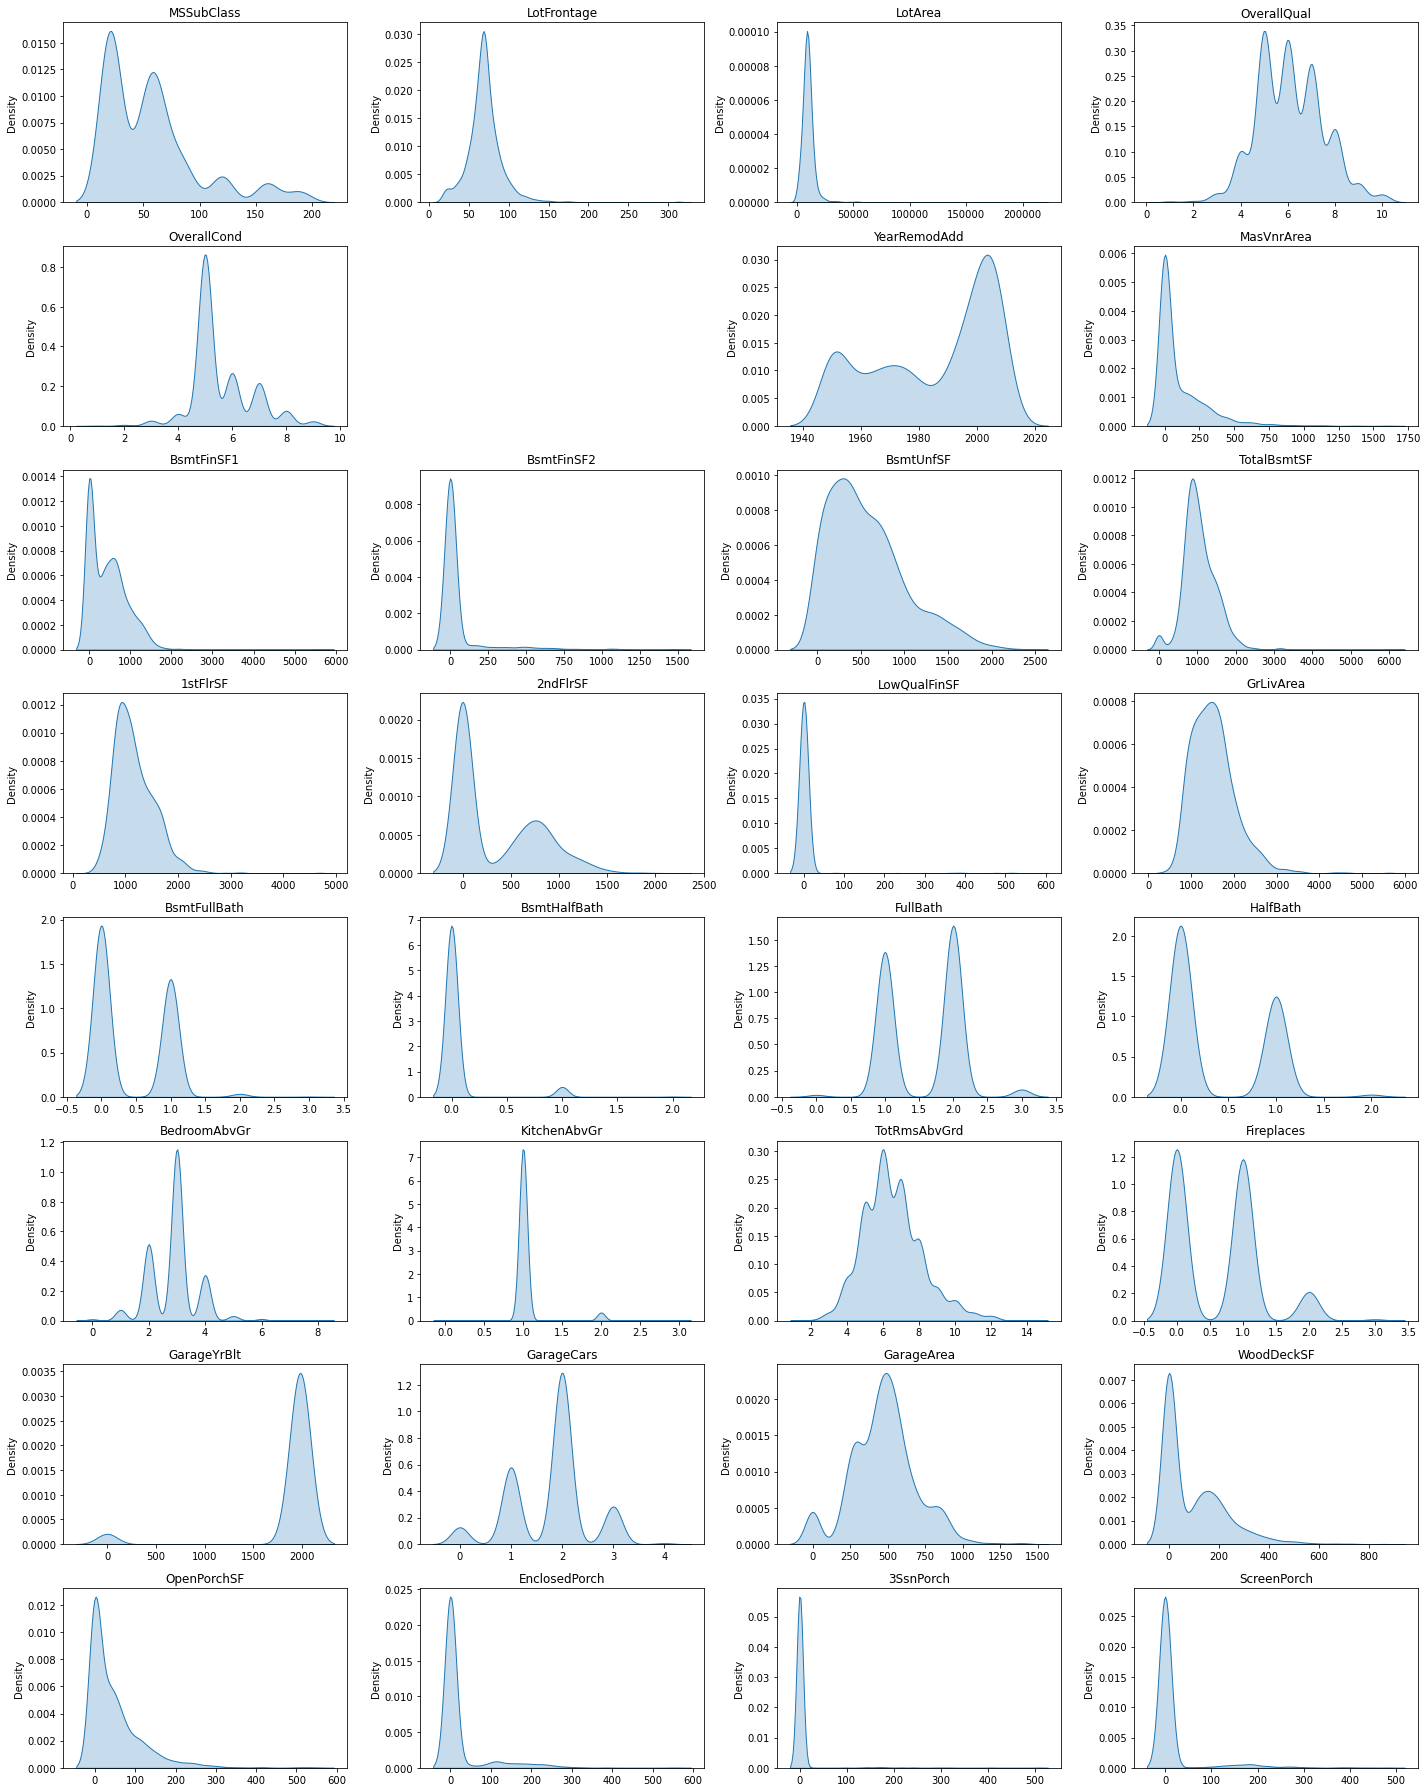

In [47]:
features = list(df_train_X.columns)
feature_hist_plotter(df_train_X, features, 8, 4)

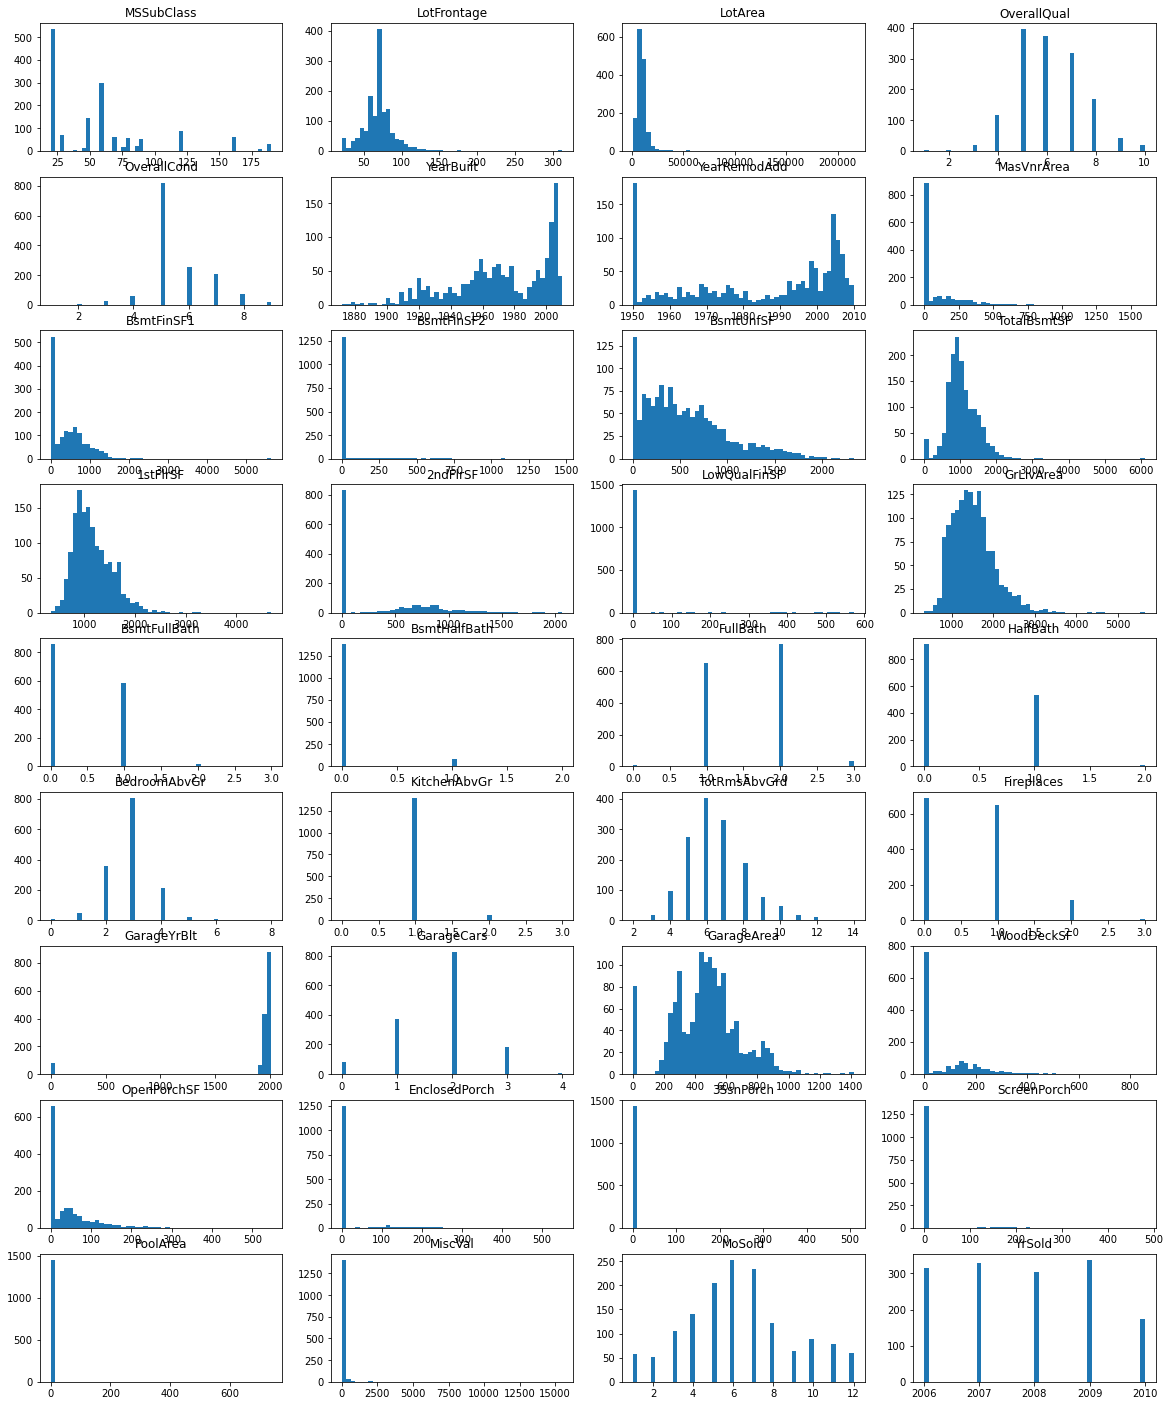

In [48]:
plt.figure(figsize=(20,25))
temp =  ['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']
for idx,ele in enumerate(temp):
    plt.subplot(9,4,idx+1)
    plt.hist(df_train_X.loc[:,ele], bins = 50)
    plt.gca().set_title(ele)
    
plt.show()

## 1.2 Outlier detection and processing

Notice that we have some continous numerical data and some discrete numerical data, we can see there are some outliers for the below variables:
* 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch'

In [49]:
features_to_winsorize = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch']

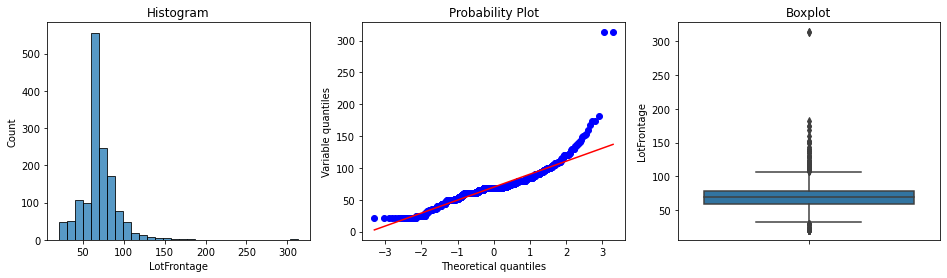

In [50]:
diagnostic_plots(df_train_X, 'LotFrontage')

In [51]:
from scipy.stats.mstats import winsorize

df_train_X[features_to_winsorize] = df_train_X[features_to_winsorize].apply(lambda x: winsorize(x, limits=[0.01, 0.01]))

#winsorize more on some of the variables

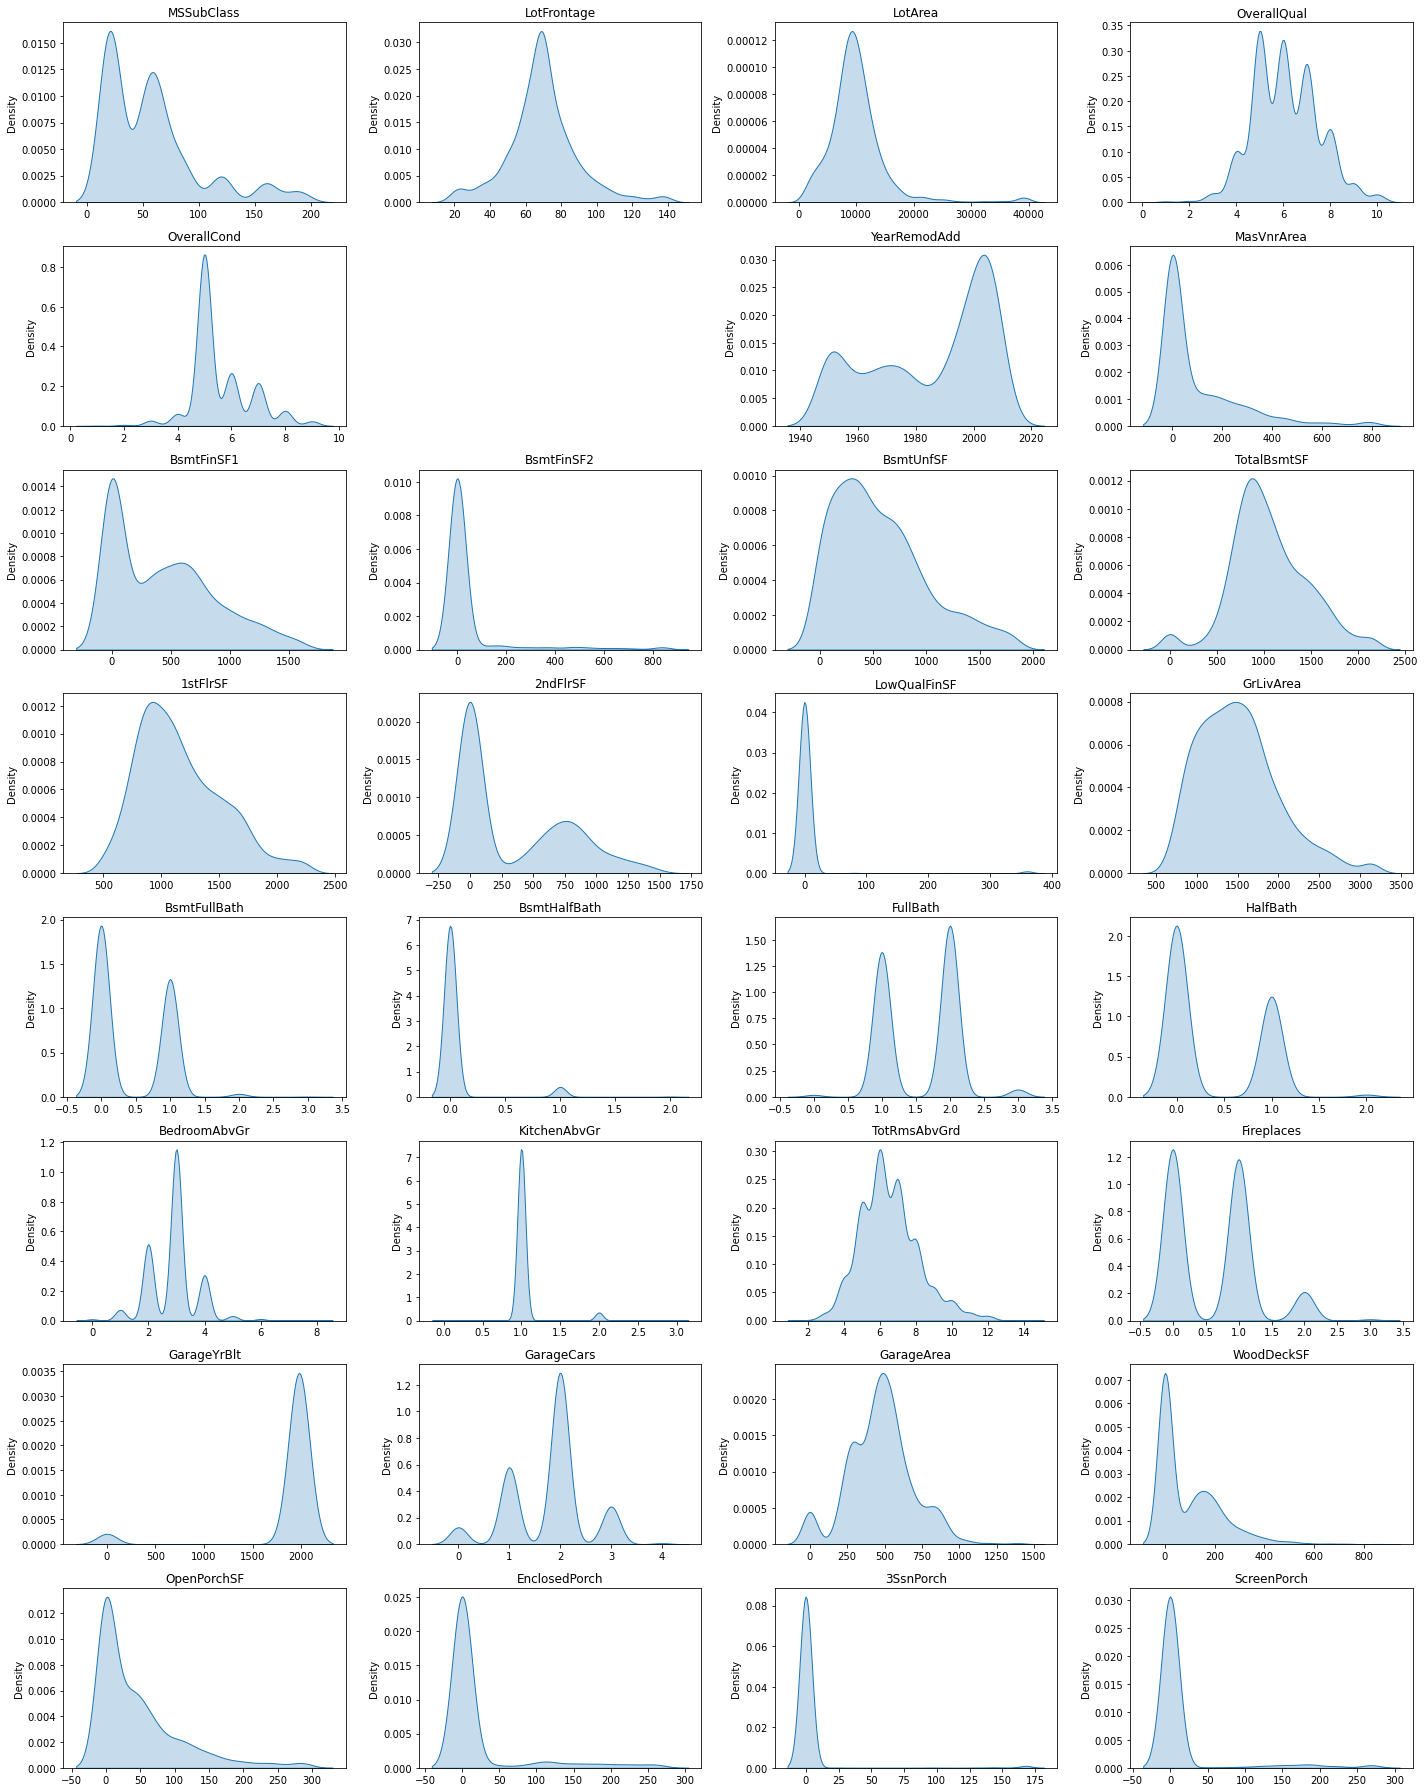

In [52]:
features = list(df_train_X.columns)
feature_hist_plotter(df_train_X, features, 8, 4)

## 1.3 Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()

features_for_StandardScaler = ['MSSubClass','LotFrontage','LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'TotRmsAbvGrd', 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

ct = ColumnTransformer([
        ('standard', StandardScaler(), features_for_StandardScaler)
    ], remainder='passthrough')

df_train_X_scaled = ct.fit_transform(df_train_X)

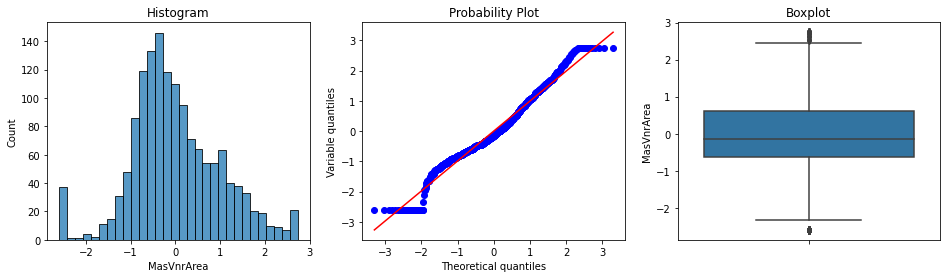

In [54]:
diagnostic_plots(pd.DataFrame(df_train_X_scaled, columns = df_train_X.columns), "MasVnrArea")

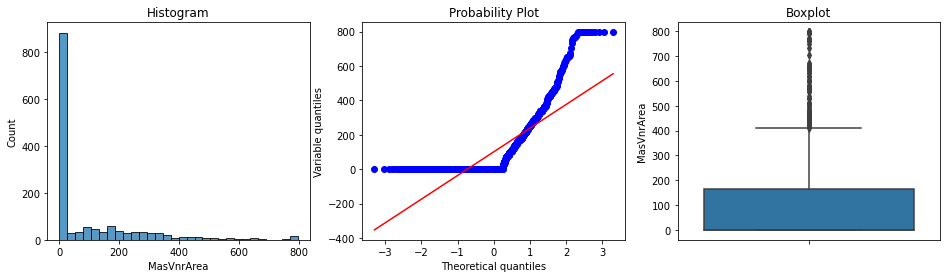

In [55]:
diagnostic_plots(df_train_X, "MasVnrArea")

## 2. Feature Engineering

* log transform applied to target

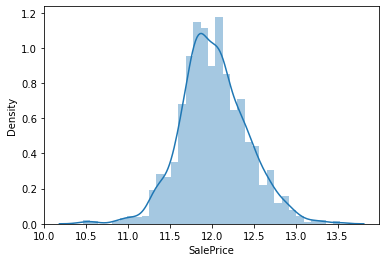

In [56]:
df_train_y = np.log(df_train_y)
sns.distplot(df_train_y)

In [57]:
df_train_y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

### Feature selection here

## 3. model build and fit
* Linear regression, lasso, ridge, ElasticNet
* Gradient Boosting Regression
* RandomForestRegressor
* SVM
* XGBoost Regressor
* LGBM Regressor

### Spare some data for internal out of sample test, by train test split

In [58]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
df_train_X, df_test_X, df_train_y, df_test_y = train_test_split(df_train_X, df_train_y, test_size=0.1, random_state=42)

In [59]:
df_train_X

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
907           50         86.0    11500            7            7       1936   
782           20         67.0    16285            7            5       2001   
952           85         60.0     7200            5            8       1972   
620           30         45.0     8248            3            3       1914   
669           30         80.0    11600            4            5       1922   
...          ...          ...      ...          ...          ...        ...   
1095          20         78.0     9317            6            5       2006   
1130          50         65.0     7804            4            3       1928   
1294          20         60.0     8172            5            7       1955   
860           50         55.0     7642            7            8       1918   
1126         120         53.0     3684            7            5       2007   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
907           1987         0.0         223           0  ...               0   
782           2002         0.0           0           0  ...               0   
952           2003         0.0         660           0  ...               0   
620           1950         0.0          41           0  ...               0   
669           1950         0.0           0           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
1095          2006         0.0          24           0  ...               0   
1130          1950         0.0         622           0  ...               0   
1294          1990         0.0         167           0  ...               0   
860           1998         0.0           0           0  ...               0   
1126          2007       130.0           0           0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
907                0             0             0            1   
782                0             0             0            1   
952                0             0             0            1   
620                0             0             0            1   
669                0             0             0            1   
...              ...           ...           ...          ...   
1095               0             0             0            1   
1130               0             0             0            1   
1294               0             0             0            1   
860                0             0             0            1   
1126               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
907                       0                     0                     0   
782                       0                     0                     0   
952                       0                     0                     0   
620                       0                     0                     0   
669                       0                     0                     0   
...                     ...                   ...                   ...   
1095                      0                     0                     0   
1130                      0                     0                     0   
1294                      0                     0                     0   
860                       0                     0                     0   
1126                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
907                      1                      0  
782                      1                      0  
952                      1                      0  
620                      1                      0  
669                      1                      0  
...                    ...                    ...  
1095                     1                      0  
1130      

In [60]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [61]:
from sklearn.linear_model import LassoCV

In [62]:
n_folds = 5
#kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train_X.values)

lasso_CV = LassoCV(cv = 5, random_state = 0).fit(df_train_X.values, df_train_y.values)
lasso_CV.score(df_train_X.values, df_train_y.values)

0.8107440703533844

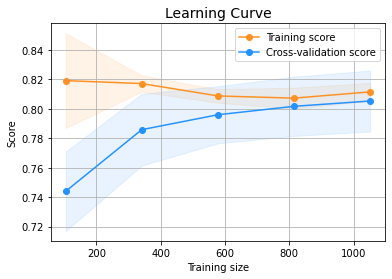

In [63]:
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(lasso_CV, df_train_X, df_train_y, cv=5, n_jobs=4)

In [64]:
lasso_CV.alpha_

0.8006298674101244

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_pca = pd.DataFrame(pca.fit_transform(df_train_X))
X_pca

0            1           2           3           4   \
0     1379.186240   403.116878  785.510991  -33.316894 -129.205235   
1     6147.766705   185.124635 -123.836979 -648.370093  882.386614   
2    -2973.527349  -800.091762 -374.341352   73.529635 -228.059773   
3    -1956.270483 -1067.788598  246.819787 -739.212990  810.640936   
4     1429.464782  -480.043029   89.022691 -399.715532  395.656952   
...           ...          ...         ...         ...         ...   
1309  -819.332131   316.463215 -195.970310 -484.774350  731.722305   
1310 -2289.960403   588.048510   70.477654  256.475990 -362.610902   
1311 -2001.385812  -460.952265 -126.239587 -299.851485  317.966306   
1312 -2509.201947    78.177442  429.215906 -267.281599  257.001079   
1313 -6420.532328   952.965915 -323.082493 -336.890706  680.367992   

               5           6           7           8           9   ...  \
0       56.162218 -118.175650  180.087960 -276.024172 -211.413901  ...   
1     -294.979379  -83.015956  -15.530849  -77.715794  100.376061  ...   
2     -299.828309 -142.116317  -15.983366   -0.247897   40.706765  ...   
3     1389.361500 -141.724772    8.770998   64.674045   42.945370  ...   
4     -305.400117  250.921094 -103.316069 -156.349484 -123.579467  ...   
...           ...         ...         ...         ...         ...  ...   
1309  -245.938537  -51.703927   32.120651 -119.391416   -2.784105  ...   
1310   134.322975   97.356727   27.497026 -104.916882  127.456755  ...   
1311  -409.671447 -125.902307  -64.126008   59.187297  154.130098  ...   
1312  -175.731902 -109.253720  101.791652 -155.265133 -123.459998  ...   
1313  -106.091056  155.492823  -89.323362   36.749176   97.048260  ...   

             20         21         22        23        24        25        26  \
0      7.177221   3.810363 -19.518177 -0.668527 -2.173322 -2.597722  0.081007   
1    -12.455646   6.215881   8.395185 -0.416773  1.347288 -0.463975  0.148726   
2      2.258195  12.627431 -16.880368 -2.052657  0.672206  0.571813 -1.815380   
3    -16.047486  -0.080238  15.150199  2.934914  0.668830  0.251624  2.819063   
4     10.256076  -5.361951  -0.347519  0.835209 -1.714628 -1.423952  1.513220   
...         ...        ...        ...       ...       ...       ...       ...   
1309   4.440410   3.883681  -0.205365 -3.320248 -1.120489 -0.010278  0.299915   
1310  -0.189510  -9.272994   8.902770  4.898019  1.704905  0.709819  3.054554   
1311 -12.276318  13.808275  -7.602754 -1.831060 -2.008045  0.467241 -0.800727   
1312 -16.404819  21.960020 -24.094830 -0.824597 -0.873369 -0.910915 -0.963796   
1313  -0.286458   5.677378   3.026284 -0.608858  1.170456  0.054144 -0.092090   

            27        28        29  
0    -0.965279 -0.456886 -0.653229  
1     0.130081 -0.890199 -0.560716  
2    -0.196781 -0.448266  0.592593  
3    -0.226445  0.055490 -0.939092  
4    -0.371852 -0.586043  0.479958  
...        ...       ...       ...  
1309 -0.310705 -1.065760 -0.690546  
1310 -1.094940 -0.254430 -0.770057  
1311 -0.644939  0.984579  0.676969  
1312  1.331433  0.155579 -0.545210  
1313  0.143522 -0.088071 -0.341451  

[1314 rows x 30 columns]

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

lasso_grid_search = Lasso()
param_grid = {
    'alpha' : np.linspace(0.6,1, 10)
}

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [None, 'log2', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 50, num = 4)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#Control learning rate
eta_range = [0.1, 0.3]
#Maximum depth of a tree
max_depth_range = [4,6,8,10]
XGBoost_grid = {
    'eta' : eta_range,
    'max_depth' : max_depth_range
}

#SVR
#SVR_params = {'C': [0.5, 0.75, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
SVR_params = {'C': [0.5, 0.75, 1]}


#Linear
lasso_cv_searched = GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv = 5)
lasso_cv_searched.fit(df_train_X.values, df_train_y.values)

#RandomForest = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#RandomForest.fit(df_train_X.values, df_train_y.values)

#Bagging
#Forest = GridSearchCV(estimator = ExtraTreesRegressor(), param_grid = random_grid, cv = 5)
#Forest = ExtraTreesRegressor()
#Forest.fit(df_train_X.values, df_train_y.values)

#Boosting
XGBoost = GridSearchCV(estimator = XGBRegressor(), param_grid = XGBoost_grid, cv = 5)
XGBoost.fit(df_train_X.values, df_train_y.values)

SVR_model = GridSearchCV(estimator = SVR(), param_grid = SVR_params, cv = 5)
SVR_model.fit(df_train_X.values, df_train_y.values)


print("Best params for Lasso:", lasso_cv_searched.best_params_)
print("Best score for Lasso:", lasso_cv_searched.best_score_)

#print("Best params for Random Forest:", RandomForest.best_params_)
#print("Best score for Random Forest:", RandomForest.best_score_)

print("Best params for XGBoost:", XGBoost.best_params_)
print("Best score for XGBoost:", XGBoost.best_score_)

print("Best params for SVR:", SVR_model.best_params_)
print("Best score for SVR:", SVR_model.best_score_)

Best params for Lasso: {'alpha': 0.6}
Best score for Lasso: 0.8113069342138655
Best params for XGBoost: {'eta': 0.1, 'max_depth': 6}
Best score for XGBoost: 0.8802436169477579
Best params for SVR: {'C': 1}
Best score for SVR: 0.7346492623321019


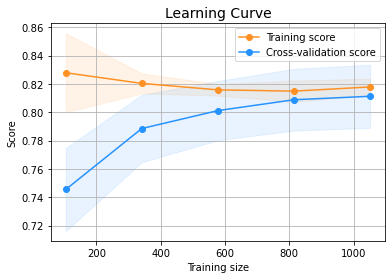

In [67]:
plot_learning_curve(lasso_cv_searched, df_train_X, df_train_y, cv=5, n_jobs=4)

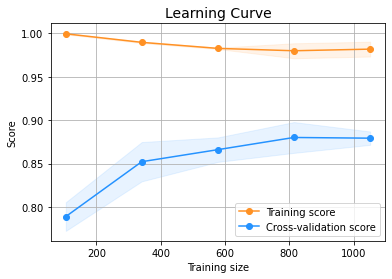

In [68]:
plot_learning_curve(XGBoost, df_train_X, df_train_y, cv=5, n_jobs=4)

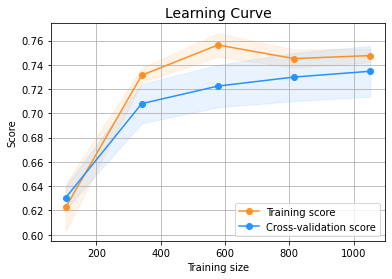

In [69]:
plot_learning_curve(SVR_model, df_train_X, df_train_y, cv=5, n_jobs=4)

Notice that the training size is more than 1000 so we have a solid cross validation result based on the current number of dataset

In [70]:
lasso_y_hat = lasso_cv_searched.predict(df_test_X.values)
xgboost_y_hat = XGBoost.predict(df_test_X.values)
#ExtraTree_y_hat = Forest.predict(df_test_X.values)
SVR_y_hat = SVR_model.predict(df_test_X.values)

In [71]:
y = df_test_y.values

## Out of Sample R squared

In [72]:
from sklearn.metrics import r2_score
print("Lasso, Out of Sample R squared:", r2_score(np.exp(y), np.exp(lasso_y_hat))) #scale it back to the original y hat
print("XGBoost, Out of Sample R squared:", r2_score(np.exp(y), np.exp(xgboost_y_hat))) #scale it back to the original y hat
print("SVR, Out of Sample R squared:", r2_score(np.exp(y), np.exp(SVR_y_hat))) #scale it back to the original y hat

Lasso, Out of Sample R squared: 0.8441425936444684
XGBoost, Out of Sample R squared: 0.9140837566189425
SVR, Out of Sample R squared: 0.7587130599301635


## Feature Selection From Model

https://github.com/scikit-learn/scikit-learn/issues/10291

* RFE select from model
* Select K best with metric imported

In [101]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline 
from sklearn.feature_selection import RFE

#pipe = make_pipeline(StandardScaler(), SelectFromModel(clf), clone(clf))  

#XGBoost = GridSearchCV(estimator = XGBRegressor(), param_grid = XGBoost_grid, cv = 5)
#XGBoost.fit(df_train_X.values, df_train_y.values)

#xgboost_feature_select = SelectFromModel(Lasso())
xgboost_feature_select = RFE(XGBRegressor(), step=1)
X_new = xgboost_feature_select.fit_transform(df_train_X.values, df_train_y.values)
X_new

array([[8.6000e+01, 1.1500e+04, 7.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.7000e+01, 1.6285e+04, 7.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.0000e+01, 7.2000e+03, 5.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [6.0000e+01, 8.1720e+03, 5.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.5000e+01, 7.6420e+03, 7.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.3000e+01, 3.6840e+03, 7.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [102]:
X_new.shape

(1314, 116)

In [103]:
XGBoost_new = GridSearchCV(estimator = XGBRegressor(), param_grid = XGBoost_grid, cv = 5)
XGBoost_new.fit(X_new, df_train_y.values)

print("Best params for XGBoost:", XGBoost_new.best_params_)
print("Best score for XGBoost:", XGBoost_new.best_score_)

Best params for XGBoost: {'eta': 0.1, 'max_depth': 4}
Best score for XGBoost: 0.8818459168958345


In [93]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from sklearn.feature_selection import f_regression, mutual_info_regression

selector = SelectKBest(score_func = mutual_info_regression, k=80)
X_reduced = selector.fit_transform(df_train_X, df_train_y)
X_reduced 

array([[5.0000e+01, 8.6000e+01, 1.1500e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 6.7000e+01, 1.6285e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [8.5000e+01, 6.0000e+01, 7.2000e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+01, 6.0000e+01, 8.1720e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [5.0000e+01, 5.5000e+01, 7.6420e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.2000e+02, 5.3000e+01, 3.6840e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [94]:
#Linear
lasso_cv_reduced = GridSearchCV(estimator = Lasso(), param_grid = param_grid, cv = 5)
lasso_cv_reduced.fit(X_reduced, df_train_y.values)

#RandomForest = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#RandomForest.fit(df_train_X.values, df_train_y.values)

#Bagging
#Forest = GridSearchCV(estimator = ExtraTreesRegressor(), param_grid = random_grid, cv = 5)
#Forest = ExtraTreesRegressor()
#Forest.fit(df_train_X.values, df_train_y.values)

#Boosting
XGBoost_reduced = GridSearchCV(estimator = XGBRegressor(), param_grid = XGBoost_grid, cv = 5)
XGBoost_reduced.fit(X_reduced, df_train_y.values)

SVR_model_reduced = GridSearchCV(estimator = SVR(), param_grid = SVR_params, cv = 5)
SVR_model_reduced.fit(X_reduced, df_train_y.values)


print("Best params for Lasso:", lasso_cv_reduced.best_params_)
print("Best score for Lasso:", lasso_cv_reduced.best_score_)

#print("Best params for Random Forest:", RandomForest.best_params_)
#print("Best score for Random Forest:", RandomForest.best_score_)

print("Best params for XGBoost:", XGBoost_reduced.best_params_)
print("Best score for XGBoost:", XGBoost_reduced.best_score_)

print("Best params for SVR:", SVR_model_reduced.best_params_)
print("Best score for SVR:", SVR_model_reduced.best_score_)

Best params for Lasso: {'alpha': 0.6}
Best score for Lasso: 0.8117120302616433
Best params for XGBoost: {'eta': 0.1, 'max_depth': 4}
Best score for XGBoost: 0.8804284720733679
Best params for SVR: {'C': 1}
Best score for SVR: 0.7356392029488067
